## Graded Challenge 1


## I. Perkenalan
Nama : Fachmi Maris
Batch : 002

### Latar Belakang Permasalahan
Pandemi (dari bahasa Yunani πᾶν pan yang artinya semua dan δήμος demos yang artinya orang) adalah epidemi penyakit yang menyebar di wilayah yang luas, misalnya beberapa benua, atau di seluruh dunia. Pada tahun 2019 terjadi pandemi yang mencakup bumi yang melanda seluruh negara di dunia. Polandia termasuk salah satu negara di eropa yang mengalami pandemi Covid19.

## Problem Statement
1. Berapa rata-rata kenaikan harian Confirmed ,Deaths, Recovered selama tahun 2021?
2. Berapa persentase Case Fatality Rate (CFR) tertinggi?
3. Berapa persentase perbandingan Recovered dengan Confirmed terendah?



## II. Import pustaka 
Import pustaka yang dibutuhkan pada project ini adalah library pandas , datetime ,dan matplotlib

Pandas digunakan untuk pengolahan data terhadap dataframes

Datetime digunakan untuk membuat format penanggalan

Matplotlib digunakan untuk visualisasi data 


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## III. Data Loading
Data Loading yang berlaku pada project ini adalah Bigquery dengan database data.covid19_jhu_csse_eu

SELECT *
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
where country_region = 'Poland'

In [30]:
df= pd.read_csv("D:\GC1\Tugas1\Covid_Polandia.csv")
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Poland,2022-01-05,51.9194,19.1451,POINT(19.1451 51.9194),4162715,98666,NaN,NaN,NaN,NaN,Poland
1,NaN,Poland,2021-11-24,51.9194,19.1451,POINT(19.1451 51.9194),3406129,81688,NaN,NaN,NaN,NaN,Poland
2,NaN,Poland,2020-03-04,51.9194,19.1451,POINT(19.1451 51.9194),1,0,0.0,NaN,NaN,NaN,NaN
3,NaN,Poland,2021-07-28,51.9194,19.1451,POINT(19.1451 51.9194),2882465,75252,2653446.0,153767.0,NaN,NaN,Poland
4,NaN,Poland,2022-06-03,51.9194,19.1451,POINT(19.1451 51.9194),6008295,116338,NaN,NaN,NaN,NaN,Poland


In [3]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
941,NaN,Poland,2022-03-18,51.9194,19.1451,POINT(19.1451 51.9194),5875072,114087,NaN,NaN,NaN,NaN,Poland
942,NaN,Poland,2022-05-13,51.9194,19.1451,POINT(19.1451 51.9194),6002863,116186,NaN,NaN,NaN,NaN,Poland
943,NaN,Poland,2021-02-17,51.9194,19.1451,POINT(19.1451 51.9194),1605372,41308,1354598.0,209466.0,NaN,NaN,Poland
944,NaN,Poland,2020-07-23,51.9194,19.1451,POINT(19.1451 51.9194),41580,1651,31541.0,8388.0,NaN,NaN,Poland
945,NaN,Poland,2020-05-04,51.9194,19.1451,POINT(19.1451 51.9194),14006,698,4095.0,9213.0,NaN,NaN,Poland


## IV. Data Cleaning


Menghapus Kolom

In [4]:
Covid_Poland_Hapus_Kolom=df.drop(["fips","admin2","combined_key","location_geom","latitude","longitude","province_state"],axis=1)
Covid_Poland_Hapus_Kolom

,country_region,date,confirmed,deaths,recovered,active
0,Poland,2022-01-05,4162715,98666,NaN,NaN
1,Poland,2021-11-24,3406129,81688,NaN,NaN
2,Poland,2020-03-04,1,0,0.0,NaN
3,Poland,2021-07-28,2882465,75252,2653446.0,153767.0
4,Poland,2022-06-03,6008295,116338,NaN,NaN
...,...,...,...,...,...,...
941,Poland,2022-03-18,5875072,114087,NaN,NaN
942,Poland,2022-05-13,6002863,116186,NaN,NaN
943,Poland,2021-02-17,1605372,41308,1354598.0,209466.0
944,Poland,2020-07-23,41580,1651,31541.0,8388.0


Menghapus Missing Values

In [5]:
Covid_Poland_Hapus_Null=Covid_Poland_Hapus_Kolom.dropna() 
Covid_Poland_Hapus_Null

,country_region,date,confirmed,deaths,recovered,active
3,Poland,2021-07-28,2882465,75252,2653446.0,153767.0
7,Poland,2021-03-09,1811036,45599,1503353.0,262084.0
8,Poland,2020-11-21,843475,13288,407075.0,423112.0
13,Poland,2020-09-23,81673,2344,65561.0,13768.0
15,Poland,2021-06-05,2874824,74139,2644273.0,156412.0
...,...,...,...,...,...,...
938,Poland,2020-11-28,973593,16746,538273.0,418574.0
940,Poland,2021-03-03,1735406,44360,1441479.0,249567.0
943,Poland,2021-02-17,1605372,41308,1354598.0,209466.0
944,Poland,2020-07-23,41580,1651,31541.0,8388.0


Mengurutkan Data Berdasarkan Urutan Kolom Date

In [6]:
Covid_Poland=Covid_Poland_Hapus_Null.sort_values('date')
Covid_Poland

,country_region,date,confirmed,deaths,recovered,active
504,Poland,2020-03-22,634,7,13.0,614.0
937,Poland,2020-03-23,749,8,13.0,728.0
550,Poland,2020-03-24,901,10,1.0,890.0
509,Poland,2020-03-25,1051,14,7.0,1030.0
109,Poland,2020-03-26,1221,16,7.0,1198.0
...,...,...,...,...,...,...
605,Poland,2021-07-31,2882939,75261,2653700.0,153978.0
636,Poland,2021-08-01,2883029,75261,2653807.0,153961.0
918,Poland,2021-08-02,2883120,75261,2653900.0,153959.0
934,Poland,2021-08-03,2883284,75265,2653934.0,154085.0


Mengubah Nama Kolom

In [7]:
Covid_Poland = Covid_Poland.rename(columns={"country_region": "Country", "date": "Date_Time", "confirmed": "Confirmed", "deaths": "Deaths", "recovered": "Recovered", "active": "Active"})
Covid_Poland

,Country,Date_Time,Confirmed,Deaths,Recovered,Active
504,Poland,2020-03-22,634,7,13.0,614.0
937,Poland,2020-03-23,749,8,13.0,728.0
550,Poland,2020-03-24,901,10,1.0,890.0
509,Poland,2020-03-25,1051,14,7.0,1030.0
109,Poland,2020-03-26,1221,16,7.0,1198.0
...,...,...,...,...,...,...
605,Poland,2021-07-31,2882939,75261,2653700.0,153978.0
636,Poland,2021-08-01,2883029,75261,2653807.0,153961.0
918,Poland,2021-08-02,2883120,75261,2653900.0,153959.0
934,Poland,2021-08-03,2883284,75265,2653934.0,154085.0


In [8]:
Covid_Poland['Date_Time'] = pd.to_datetime(Covid_Poland['Date_Time'], format='%Y-%m-%d')

In [9]:
#Data yang tersedia masih berbentuk data komulatif sehingga diperlukan mencari selisih per harinya
# reff : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

Covid_Poland["Diff_Confirmed"] = Covid_Poland["Confirmed"].diff()
Covid_Poland["Diff_Deaths"] = Covid_Poland["Deaths"].diff()
Covid_Poland["Diff_Recovered"] = Covid_Poland["Recovered"].diff()
Covid_Poland["Diff_Active"] = Covid_Poland["Active"].diff()
Covid_Poland


,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
504,Poland,2020-03-22,634,7,13.0,614.0,NaN,NaN,NaN,NaN
937,Poland,2020-03-23,749,8,13.0,728.0,115.0,1.0,0.0,114.0
550,Poland,2020-03-24,901,10,1.0,890.0,152.0,2.0,-12.0,162.0
509,Poland,2020-03-25,1051,14,7.0,1030.0,150.0,4.0,6.0,140.0
109,Poland,2020-03-26,1221,16,7.0,1198.0,170.0,2.0,0.0,168.0
...,...,...,...,...,...,...,...,...,...,...
605,Poland,2021-07-31,2882939,75261,2653700.0,153978.0,153.0,2.0,92.0,59.0
636,Poland,2021-08-01,2883029,75261,2653807.0,153961.0,90.0,0.0,107.0,-17.0
918,Poland,2021-08-02,2883120,75261,2653900.0,153959.0,91.0,0.0,93.0,-2.0
934,Poland,2021-08-03,2883284,75265,2653934.0,154085.0,164.0,4.0,34.0,126.0


In [10]:
Covid_Poland.head()

,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
504,Poland,2020-03-22,634,7,13.0,614.0,NaN,NaN,NaN,NaN
937,Poland,2020-03-23,749,8,13.0,728.0,115.0,1.0,0.0,114.0
550,Poland,2020-03-24,901,10,1.0,890.0,152.0,2.0,-12.0,162.0
509,Poland,2020-03-25,1051,14,7.0,1030.0,150.0,4.0,6.0,140.0
109,Poland,2020-03-26,1221,16,7.0,1198.0,170.0,2.0,0.0,168.0


In [11]:
Covid_Poland.tail()

,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
605,Poland,2021-07-31,2882939,75261,2653700.0,153978.0,153.0,2.0,92.0,59.0
636,Poland,2021-08-01,2883029,75261,2653807.0,153961.0,90.0,0.0,107.0,-17.0
918,Poland,2021-08-02,2883120,75261,2653900.0,153959.0,91.0,0.0,93.0,-2.0
934,Poland,2021-08-03,2883284,75265,2653934.0,154085.0,164.0,4.0,34.0,126.0
750,Poland,2021-08-04,2883448,75269,2653981.0,154198.0,164.0,4.0,47.0,113.0


## V. Explorasi Data


In [12]:
Covid_Poland

,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
504,Poland,2020-03-22,634,7,13.0,614.0,NaN,NaN,NaN,NaN
937,Poland,2020-03-23,749,8,13.0,728.0,115.0,1.0,0.0,114.0
550,Poland,2020-03-24,901,10,1.0,890.0,152.0,2.0,-12.0,162.0
509,Poland,2020-03-25,1051,14,7.0,1030.0,150.0,4.0,6.0,140.0
109,Poland,2020-03-26,1221,16,7.0,1198.0,170.0,2.0,0.0,168.0
...,...,...,...,...,...,...,...,...,...,...
605,Poland,2021-07-31,2882939,75261,2653700.0,153978.0,153.0,2.0,92.0,59.0
636,Poland,2021-08-01,2883029,75261,2653807.0,153961.0,90.0,0.0,107.0,-17.0
918,Poland,2021-08-02,2883120,75261,2653900.0,153959.0,91.0,0.0,93.0,-2.0
934,Poland,2021-08-03,2883284,75265,2653934.0,154085.0,164.0,4.0,34.0,126.0


Menggunakan Fungsi Aggregat atau Grouping

In [13]:
#Aggregat atau Grouping 1 = Mencari range tanggal penelitian 
Covid_Poland.loc[Covid_Poland["Country"] == "Poland", "Date_Time"].agg(("min", "max" ))


min   2020-03-22
max   2021-08-04
Name: Date_Time, dtype: datetime64[ns]

In [14]:
#Aggregat atau Grouping 2 = Mencari rata-rata tiap kolom berdasarkan tahun
#reff : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html 
Covid_Poland.groupby(Covid_Poland.Date_Time.dt.year).mean()


,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
Date_Time,,,,,,,,
2020,2.448428e+05,4990.512281,1.545030e+05,85349.277193,4557.197183,100.517606,3648.327465,808.352113
2021,2.332495e+06,58084.083333,2.052681e+06,221730.069444,7354.490741,216.273148,7490.013889,-351.796296


In [15]:
#Aggregat atau Grouping 3 = Mencari rata-rata tiap kolom berdasarkan bulan

Covid_Poland.groupby(Covid_Poland.Date_Time.dt.month).mean()

,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
Date_Time,,,,,,,,
1,1.418924e+06,32954.870968,1.166985e+06,218983.774194,7048.612903,278.258065,7559.000000,-788.645161
2,1.597914e+06,40720.964286,1.344692e+06,212501.035714,6914.321429,235.321429,5441.500000,1237.500000
3,1.490344e+06,36285.463415,1.213748e+06,240310.268293,15410.200000,232.550000,10977.250000,4200.400000
4,1.313776e+06,30446.550000,1.119376e+06,163953.033333,8016.516667,251.133333,10635.233333,-2869.850000
5,1.432279e+06,36088.629032,1.299699e+06,96492.000000,1468.548387,107.467742,2434.096774,-1073.016129
6,1.453559e+06,37931.383333,1.331814e+06,83813.983333,303.933333,27.916667,368.466667,-92.450000
7,1.460394e+06,38390.709677,1.340626e+06,81377.241935,231.000000,7.951613,235.790323,-12.741935
8,3.797473e+05,10266.742857,3.383148e+05,31165.742857,634.085714,9.457143,369.485714,255.142857
9,7.714510e+04,2248.300000,6.048863e+04,14408.166667,804.733333,15.800000,768.566667,20.366667


In [16]:
Covid_Poland

,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
504,Poland,2020-03-22,634,7,13.0,614.0,NaN,NaN,NaN,NaN
937,Poland,2020-03-23,749,8,13.0,728.0,115.0,1.0,0.0,114.0
550,Poland,2020-03-24,901,10,1.0,890.0,152.0,2.0,-12.0,162.0
509,Poland,2020-03-25,1051,14,7.0,1030.0,150.0,4.0,6.0,140.0
109,Poland,2020-03-26,1221,16,7.0,1198.0,170.0,2.0,0.0,168.0
...,...,...,...,...,...,...,...,...,...,...
605,Poland,2021-07-31,2882939,75261,2653700.0,153978.0,153.0,2.0,92.0,59.0
636,Poland,2021-08-01,2883029,75261,2653807.0,153961.0,90.0,0.0,107.0,-17.0
918,Poland,2021-08-02,2883120,75261,2653900.0,153959.0,91.0,0.0,93.0,-2.0
934,Poland,2021-08-03,2883284,75265,2653934.0,154085.0,164.0,4.0,34.0,126.0


Menggunakan Query

In [17]:
# query 1 : memfilter seluruh kasus pada H1 (Range Awal Tahun Sampai Pertengahan Tahun 2021) 
df_H1=Covid_Poland[(Covid_Poland["Date_Time"] >= "2021-01-01") & (Covid_Poland["Date_Time"] < "2021-07-01") ]
df_H1.head()

,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
660,Poland,2021-01-01,1305774,28956,1046281.0,230537.0,10896.0,402.0,10143.0,351.0
117,Poland,2021-01-02,1312780,29058,1055436.0,228286.0,7006.0,102.0,9155.0,-2251.0
130,Poland,2021-01-03,1318562,29119,1063093.0,226350.0,5782.0,61.0,7657.0,-1936.0
472,Poland,2021-01-04,1322947,29161,1069554.0,224232.0,4385.0,42.0,6461.0,-2118.0
40,Poland,2021-01-05,1330543,29502,1078892.0,222149.0,7596.0,341.0,9338.0,-2083.0


In [18]:
# query 2 = Mencari Tanggal Dengan Kenaikan Confirmed Tertinggi dan Terendah Pada H1
df_H1[(df_H1["Diff_Confirmed"] == df_H1["Diff_Confirmed"].max()) | (df_H1["Diff_Confirmed"] == df_H1["Diff_Confirmed"].min())]


,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
41,Poland,2021-04-01,2356970,53665,1882179.0,421126.0,35253.0,620.0,20254.0,14379.0
628,Poland,2021-06-28,2879689,74979,2651681.0,153029.0,51.0,0.0,159.0,-108.0


In [19]:
# query 3 = Mencari Tanggal Dengan Angka Kematian harian Tertinggi dan Terendah
df_H1[(df_H1["Diff_Deaths"] == df_H1["Diff_Deaths"].max()) | (df_H1["Diff_Deaths"] == df_H1["Diff_Deaths"].min()) ]


,Country,Date_Time,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
629,Poland,2021-04-08,2499507,56659,2076504.0,366344.0,27890.0,956.0,21807.0,5127.0
628,Poland,2021-06-28,2879689,74979,2651681.0,153029.0,51.0,0.0,159.0,-108.0


In [20]:
df_H1.describe()

,Confirmed,Deaths,Recovered,Active,Diff_Confirmed,Diff_Deaths,Diff_Recovered,Diff_Active
count,1.810000e+02,181.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000
mean,2.226327e+06,54776.077348,1.936612e+06,234938.635359,8757.093923,256.723757,8926.237569,-425.867403
std,5.980047e+05,15665.618027,5.990286e+05,72267.288220,8652.815182,207.055524,8221.433469,6120.743808
min,1.305774e+06,28956.000000,1.046281e+06,153029.000000,51.000000,0.000000,0.000000,-21018.000000
25%,1.591497e+06,40832.000000,1.347670e+06,181441.000000,2168.000000,61.000000,2692.000000,-2601.000000
50%,2.356970e+06,53665.000000,1.882179e+06,214198.000000,6431.000000,247.000000,6938.000000,-509.000000
75%,2.854079e+06,71664.000000,2.600974e+06,267061.000000,12143.000000,389.000000,11578.000000,1313.000000
max,2.879912e+06,75021.000000,2.651787e+06,422097.000000,35253.000000,956.000000,35289.000000,18620.000000


Visualisasi Data Sederhana

In [21]:
%matplotlib inline

<AxesSubplot:xlabel='Date_Time'>

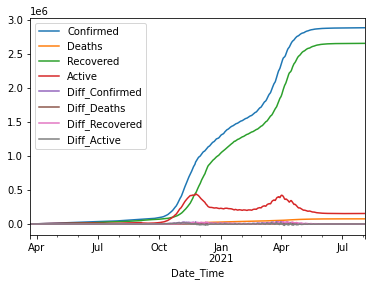

In [22]:
Covid_Poland[Covid_Poland["Country"] == "Poland"].groupby("Date_Time").sum().plot()

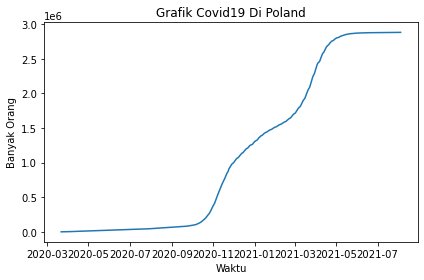

In [23]:
plt.plot(Covid_Poland["Date_Time"],Covid_Poland["Confirmed"])
plt.xlabel('Waktu')
plt.ylabel('Banyak Orang')
plt.title('Grafik Covid19 Di Poland')
plt.tight_layout()
plt.show()

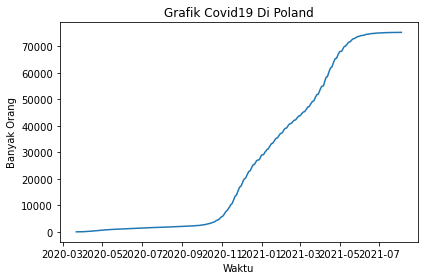

In [24]:
plt.plot(Covid_Poland["Date_Time"],Covid_Poland["Deaths"])
plt.xlabel('Waktu')
plt.ylabel('Banyak Orang')
plt.title('Grafik Covid19 Di Poland')
plt.tight_layout()
plt.show()

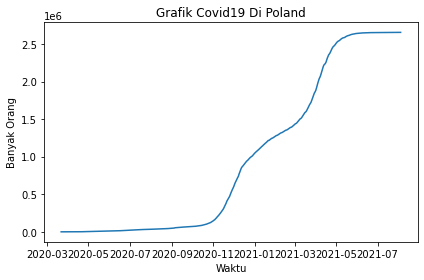

In [25]:
plt.plot(Covid_Poland["Date_Time"],Covid_Poland["Recovered"])
plt.xlabel('Waktu')
plt.ylabel('Banyak Orang')
plt.title('Grafik Covid19 Di Poland')
plt.tight_layout()
plt.show()

Menghitung Case Fatality Rate (CFR)

In [26]:
# Perbandingan antara Deaths dengan Confirmed

Covid_Poland["CFR"]= (Covid_Poland["Deaths"]/Covid_Poland["Confirmed"])*100
Covid_Poland["CFR"].head()

504    1.104101
937    1.068091
550    1.109878
509    1.332065
109    1.310401
Name: CFR, dtype: float64

In [31]:
Covid_Poland["CFR"].max()

5.0501106338669794

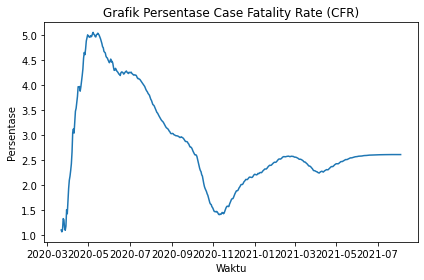

In [27]:
plt.plot(Covid_Poland["Date_Time"],Covid_Poland["CFR"])
plt.xlabel('Waktu')
plt.ylabel('Persentase')
plt.title('Grafik Persentase Case Fatality Rate (CFR)')
plt.tight_layout()
plt.show()

Menghitung Perbandingan Recovered dan Confirmed

In [28]:
Covid_Poland["Recovered/Confirmed"]= (Covid_Poland["Recovered"]/Covid_Poland["Confirmed"])*100
Covid_Poland["Recovered/Confirmed"].head()

504    2.050473
937    1.735648
550    0.110988
509    0.666032
109    0.573301
Name: Recovered/Confirmed, dtype: float64

In [33]:
Covid_Poland["Recovered/Confirmed"].min()

0.11098779134295228

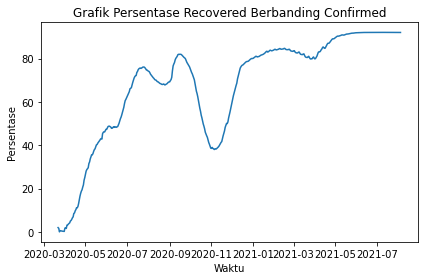

In [29]:
plt.plot(Covid_Poland["Date_Time"],Covid_Poland["Recovered/Confirmed"])
plt.xlabel('Waktu')
plt.ylabel('Persentase')
plt.title('Grafik Persentase Recovered Berbanding Confirmed')
plt.tight_layout()
plt.show()

## VI. Kesimpulan
a.  Berdasarkan pengolahan data pada penelitian ini maka diperoleh diketahui :
    Rata - rata kenaikan Confirmed harian selama tahun 2021 adalah  7354.490741 orang
    Rata - rata kenaikan Deaths harian selama tahun 2021 adalah  216.273148 orang
    Rata - rata kenaikan Recovered harian selama tahun 2021 adalah 7490.013889 orang

b.  Berdasarkan hasil pengolahan data pada penelitian ini, maka diperoleh angka CFR(%) tertinggi adalah 
    5.0501106338669794
    
c.  Berdasarkan hasil pengolahan data pada penelitian ini, maka diperoleh angka perbandingan Recovered dengan Confirmed dalam (%) terendah adalah 0.11098779134295228